# Homework 4 (100 points)

## Exercise 1 (45 pts)

Note: you may only use methods that are imported for you.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a) Generate and plot 20 (x, y) samples where x and y are exactly linearly related. (1pt)

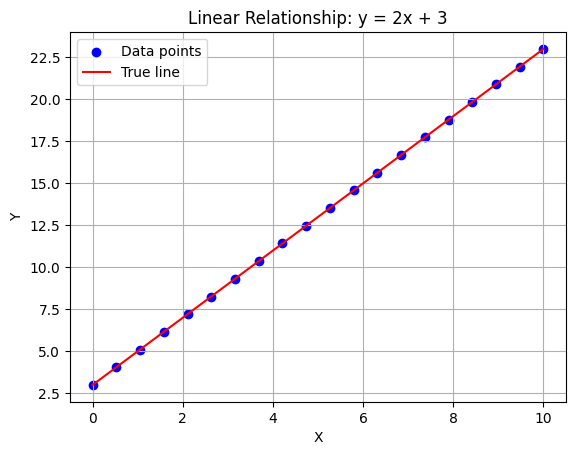

In [2]:
x = np.linspace(0, 10, 20)
m = 2
c = 3
y = m * x + c 
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y, color='red', label='True line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship: y = {}x + {}'.format(m, c))
plt.legend()
plt.grid(True)
plt.show()


b) Generate and plot 20 (x, y) samples where x and y follow the assumptions from linear regression (i.e. they are linearly related but there is a $\mathcal{N}(0, \sigma^2)$ error around that linear relationship) (1pt)

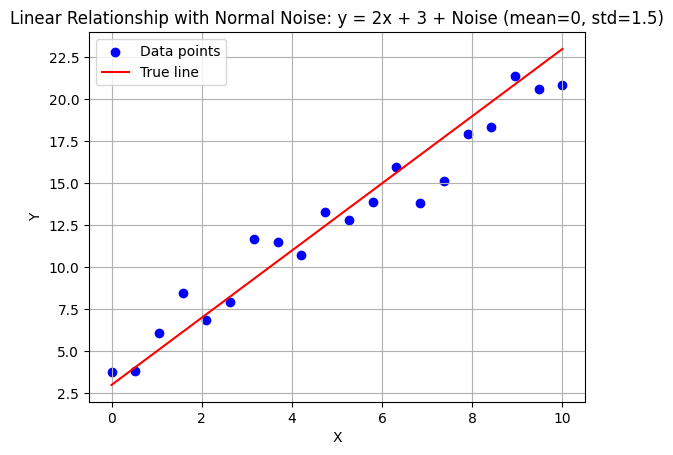

In [5]:
np.random.seed(42)
x = np.linspace(0, 10, 20)
m = 2
c = 3
sigma = 1.5
noise = np.random.normal(0, sigma, 20)
y = m * x + c + noise
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, m * x + c, color='red', label='True line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship with Normal Noise: y = {}x + {} + Noise (mean=0, std={})'.format(m, c, sigma))
plt.legend()
plt.grid(True)
plt.show()

c) Generate and plot 20 (x, y) samples where x and y are not related. (1pt)

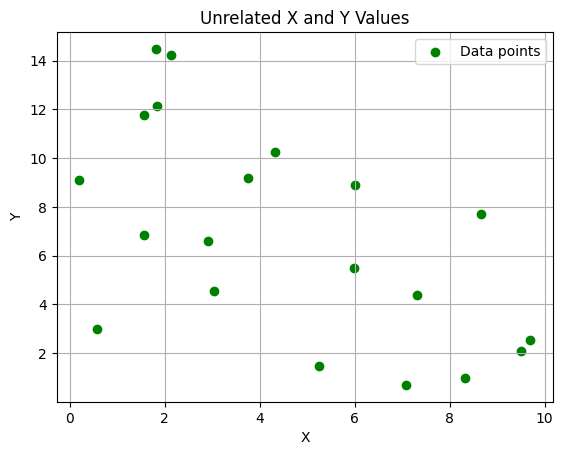

In [6]:
np.random.seed(42)
x = np.random.uniform(0, 10, 20)
y = np.random.uniform(0, 15, 20)
plt.scatter(x, y, color='green', label='Data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Unrelated X and Y Values')
plt.legend()
plt.grid(True)
plt.show()

d) Generate and plot 20 (x, y) samples where x and y are not related but there is a $\mathcal{N}(0, \sigma^2)$ error around that relationship. (1pt)

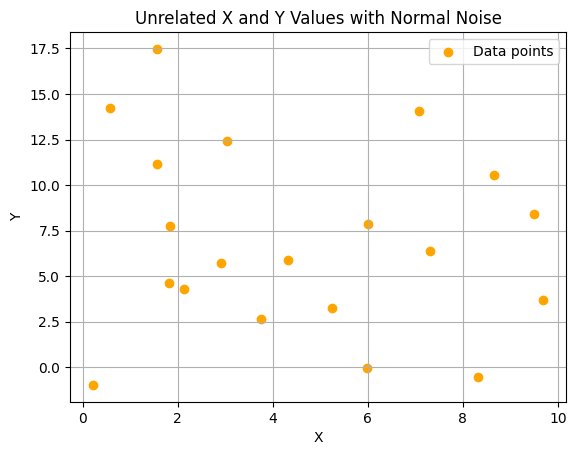

In [7]:
np.random.seed(42)
x = np.random.uniform(0, 10, 20)
sigma = 2.0
noise = np.random.normal(0, sigma, 20)
y = np.random.uniform(0, 15, 20) + noise
plt.scatter(x, y, color='orange', label='Data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Unrelated X and Y Values with Normal Noise')
plt.legend()
plt.grid(True)
plt.show()

e) Plot the least squares estimated line through the scatter plot from d). How different are the estimated intercept and slope from the true parameters you chose? (2pt)

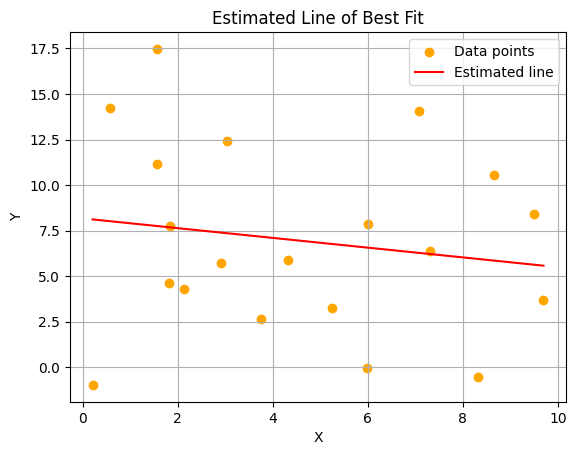

Estimated Slope: -0.2675197806268433
Estimated Intercept: 8.168572797328917


In [8]:
x_mean = np.mean(x)
y_mean = np.mean(y)
xy_mean = np.mean(x * y)
x_squared_mean = np.mean(x ** 2)
estimated_slope = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean ** 2)
estimated_intercept = y_mean - estimated_slope * x_mean
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line = estimated_slope * x_line + estimated_intercept
plt.scatter(x, y, color='orange', label='Data points')
plt.plot(x_line, y_line, color='red', label='Estimated line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Estimated Line of Best Fit')
plt.legend()
plt.grid(True)
plt.show()
print(f"Estimated Slope: {estimated_slope}")
print(f"Estimated Intercept: {estimated_intercept}")

f) For 10000 trials:

- Generate a random sample as in d)
- Record the estimated intercept and slope

Plot the histogram of the recorded estimated intercepts and slopes. Given what you know about the least squares estimate being the Best Linear Unbiased Estimator (BLUE), comment on the histogram. (4pt)

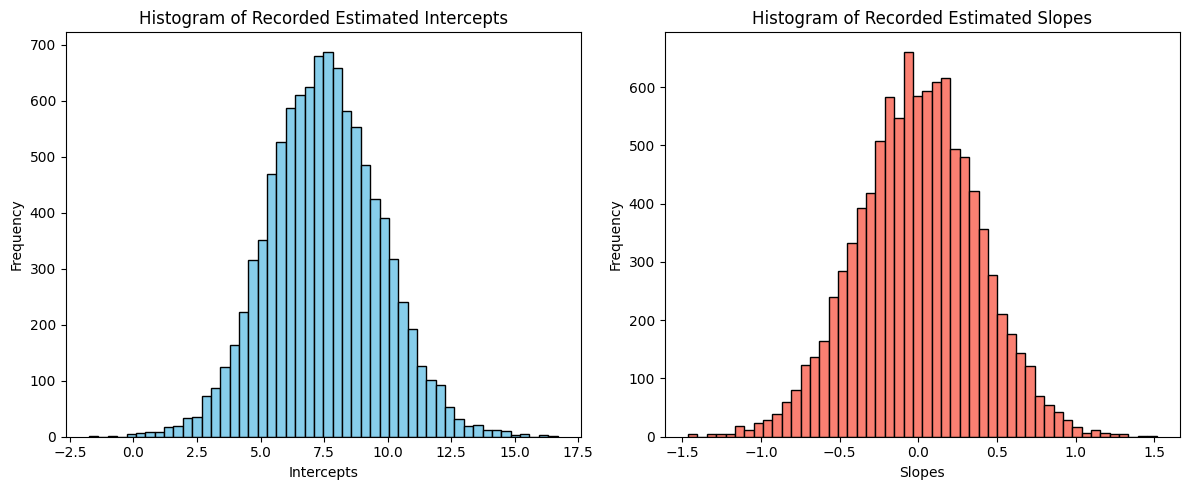

In [9]:
np.random.seed(42)

num_trials = 10000
recorded_intercepts = []
recorded_slopes = []

for _ in range(num_trials):
    x = np.random.uniform(0, 10, 20)
    sigma = 2.0
    noise = np.random.normal(0, sigma, 20)
    y = np.random.uniform(0, 15, 20) + noise
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x * y)
    x_squared_mean = np.mean(x ** 2)
    estimated_slope = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean ** 2)
    estimated_intercept = y_mean - estimated_slope * x_mean
    recorded_intercepts.append(estimated_intercept)
    recorded_slopes.append(estimated_slope)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(recorded_intercepts, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Recorded Estimated Intercepts')
plt.xlabel('Intercepts')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(recorded_slopes, bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of Recorded Estimated Slopes')
plt.xlabel('Slopes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

g) What proportion of these randomly generated samples resulted in us estimating that the slope greater than 3? (2pt)

Consider the following dataset:

In [ ]:
X = [-0.97240653, -0.74289042, -0.34537107, -0.88427372, -0.83582762, -0.11313751, -0.15789807, -0.09170238, -0.57146396, -0.05378007, -0.40539671, -0.127848, -0.42313819, -0.07068973, -0.31303086, -0.41291212, -0.31981142, -0.7584146, -0.70711314, -0.09250811]
Y = [ 1.19767097,  0.29995773, -0.64423194,  1.68648628,  1.24942173, -1.16800996, -0.03962662, -0.10352774,  0.20238111, -0.85779092, -0.3192597,  -0.10701115, 0.65195857,  1.56361601, -0.41691836,  1.94918682,  0.16463584,  1.20797826, 1.10575936, -2.11374363]

h) Based on the simulation you conducted above, approximately how likely is it to observe a dataset at least as extreme as this one under the assumption that X and Y are not related? What can you conclude about the true relationship between X and Y in this case? (5pt)

i) Based on the simulation you conducted above, approximately what value would the estimate of the slope be greater than only 2.5% of the time? (3pt)

j) Recall, we know that, provided the assumptions from linear regression hold:

$$\hat\beta \sim \mathcal{N}(\beta,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$

$$\hat\beta_k \sim \mathcal{N}(\beta_k, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Run a simulation to verify that this is the case. Plot both the histogram and distribution function for the slope and intercepts. (5pt)

k) Assuming $\beta_k = 0$ and $\sigma^2 = 1$, what value would the estimate of the slope be greater than only 2.5% of the time? (3pt)

In [ ]:
from scipy.stats import norm

l) Using the dataset from h) and assuming that the variance is known to be 1, report the 95% confidence interval around the estimate of the slope. (4pt)

m) Compare the quantiles of the sample below with the quantiles from a normal distribution with mean 0.5 and variance 0.8 by plotting the QQ plot (similar to worksheet 20). Comment on whether this sample comes from that distribution. (4pt)

In [ ]:
sample = [-0.69432553, -1.18507198, -1.10313529, -0.89965522, -1.77829857,  1.29517858, -0.26577831,  1.22107267, -1.47509329,  1.10836504, -0.69882542, -1.70683313, 1.06283306, -0.29739484,  1.00650644, -0.88249571,  0.24853913, -0.20528149, 1.05585924, 0.6289595]


n) Generate a dataset where the $R^2$ is 1.0 and a dataset where the $R^2$ is 0.0 (2pt)

o) Generate a dataset that follows the linear regression assumptions *except* that the variance is not constant. (1pt)

p) You're playing DnD with your friends but you suspect that one of your friends is using a weighted d20 die because they always seem to roll successfully. You decide to record their die rolls to evaluate this hypothesis. You record the following:

```
1 : 0 times
2 : 1 times
3 : 2 times
4 : 1 times
5 : 4 times
6 : 1 times
7 : 1 times
8 : 0 times
9 : 0 times
10 : 1 times
11 : 1 times
12 : 2 times
13 : 2 times
14 : 3 times
15 : 1 times
16 : 1 times
17 : 1 times
18 : 2 times
19 : 3 times
20 : 3 times
```

Compute the exact probability of observing something at least as extreme as the above dataset under the hypothesis that the d20 die is fair. What can you conclude? (6pts)

## Exercise 2 (55 Points)

For this exercise, recall the lab's kaggle competition where you predicted if a cookie was defective or not (assuming you attend labs). For more information on the data and details, [click here to view the competition and data details](https://www.kaggle.com/competitions/cs506-fall-2023-lab-defective-cookie-detection/data)

However, what we will do differently here is check if two of the features were correlated. This is important because if two features are correlated, then we can remove one of the features and still get the same information. This is part of the feature selection process.

### Loading in the Data

For this exercise, we are interested in the two features `Texture Hardness` and `Texture Crispiness` and want to see if they are related. To do this, we will load in the data and create a scatter plot of the two features.

**a)** (1 Point) Download the kaggle data from the link above and read in the `csv` files `cookie_train.csv` and `cookie_test.csv`

### Combining Training and Testing Data

The lab did not have a lot of cookies for the training set, so what we will do is combine the training and testing data together which won't cause any issues.

**b)** (3 Point) Combine the training and testing data together into a single dataframe called `cookie_data` and plot the scatter plot for `Texture Crispiness` (our y or our response variable) and `Texture Hardness` (our x or our explanatory variable). Make sure to label your axes and give your plot a title.

### Checking If We Can Do Linear Regression

It is important to check all requirements/assumptions for linear regression are met before we do linear regression. One of the requirements is that the explanatory variable and response variable are linearly related, which we checked by noticing the scatter plot was linear. However, there is much more to check!

#### Checking for Normality
It is important to check that the response variable is normally distributed. This is important for hypothesis testing and relates to the idea of linear regression being an unbiased, minimum variance estimator (if you're interested in finding optimal estimators given limited information, check out the course CAS MA 582. GRS MA 781/782 are also fun!).


**c) (5 Points)** Plot an appropriate graph to determine if the response variable `Texture Crispiness` follows the normality assumption. State whether if the normality assumption is met or not. If it is not met, state what can we do to fix this.

_(Written response goes in this cell)_

#### Checking for Homoscedasticity
It is important to check that the variance of the response variable is the same across all values of the explanatory variable. Otherwise, the model isn't really best fit with a line.

**d) (5 Points)** Plot an appropriate graph to determine if the response variable `Texture Crispiness` follows the homoscedasticity assumption. State whether if the homoscedasticity assumption is met or not. If it is not met, state what can we do to fix this.

_(Written response goes in this cell)_

#### Checking for Independence
It is important to check that the explanatory variable and response variable are independent. Otherwise, the model isn't really best fit with a line. To do so, we will use the Durbin-Watson test.

**e) (5 Points)** Use the Durbin-Watson test to determine if the explanatory variable and response variable are independent. State whether if the independence assumption is met or not. If it is not met, state what can we do to fix this. You may use any library to do this, and for more information, check out [this link](https://www.investopedia.com/terms/d/durbin-watson-statistic.asp).

_(Written response goes in this cell)_

#### Adjusting the Model
If you think any of the assumptions are not met, then you should respectively fix the model.

**f) (6 Points)** If you think atleast one of the assumptions were not met, then adjust the model how you described you would. Otherwise, proceed to the next step and in the cell below, write "No adjustments were made to the model". However, if you do adjust the model, then in the cell below, justify why your adjustments is appropriate (i.e. plot the new graphs and statistics found above). You may add as many cells as you like.

### Hypothesis Testing
Now that we have a model that is appropriate, we can do hypothesis testing. We will be using the Linear Regression t-test to test if the explanatory variable is a significant predictor of the response variable.

**g) (6 Points)** Use the Linear Regression t-test to determine if the explanatory variable `Texture Hardness` is a significant predictor of the response variable `Texture Crispiness`. State whether if the explanatory variable is a significant predictor of the response variable or not using an alpha significance level of $\alpha = 0.05$, the null hypothesis $\beta_{hardness} = 0$ and alternative hypothesis $\beta_{hardness} \neq 0$. If it is not, state what can we do to fix this. You may use any library to do this.

_(Written response goes in this cell)_

### Adding a New Feature
Now that we have determined that the explanatory variable is a significant predictor of the response variable, you noticed the fit isn't 100% perfect still (e.g. your model is not capturing all the variation in the data). You think that there is another feature that can help improve the model. You think that the feature `Color L*` can help improve your model. You want to test if this is true. You may assume that all the assumptions are met for this new model to conduct linear regression.

**h) (8 Points)** Now that you have two features to predict your response variable, you will have to use multiple linear regression. Use the `statsmodels` library to do multiple linear regression. Then, determine if the explanatory variables `Texture Hardness` and `Color L*` are significant predictors of the response variable `Texture Crispiness` using an alpha significance level of $\alpha = 0.001$, the null hypothesis $\beta_{hardness} = 0$ and $\beta_{sweetness} = 0$ and alternative hypothesis $\beta_{hardness} \neq 0$ and $\beta_{sweetness} \neq 0$. If it is not, state what can we do to fix this. You may use any library to do this.

Moreover, justify whether the overall model is significant or not using the F-test with the same $\alpha$ given above. If it is not, state what can we do to fix this.

_You will use the transformed model made (if one was made) from the previous parts and add this new feature to it._

_(Written response goes in this cell)_

### Interpretation
It is important to be able to interpret the results of the model. This is important because it allows us to understand the model and how it works. It also allows us to understand the relationship between the predictors and the response variable, and this applies to not just linear regression, but all learning models.

**i) (8 Points)** Interpret the coefficients of the model made in part **h**. What do they mean? What do they represent? What do they tell us about the relationship between the predictors and the response variable? If your code output in part h does not provide these results, you are welcome to use any library here to do so.

In [ ]:
#Your code in this cell if you need it

_(Written response goes in this cell)_

### Using Color b* over Color L*
You think that the feature `Color b*` can help improve your model even better instead of using `Color L*`.

For this section, you will continue to use your fixed/adjusted features for `Texture Hardness` and `Texture Crispiness`.

**j) (8 Points)** Plot 2 scatter plots: `Color b*` vs your possibly adjusted `Texture Crispiness` and `Color b*` vs your possibly adjusted `Texture Hardness`. Given these plots, propose an appropriate model. Justify your answer by fitting it and seeing its accuracy (you can use any metric to prove so), showing appropriate models/graphs, and ensuring assumptions are satisfied (if any). You may use any library to do this.